# 1. Хотим пятерку, а на деле...

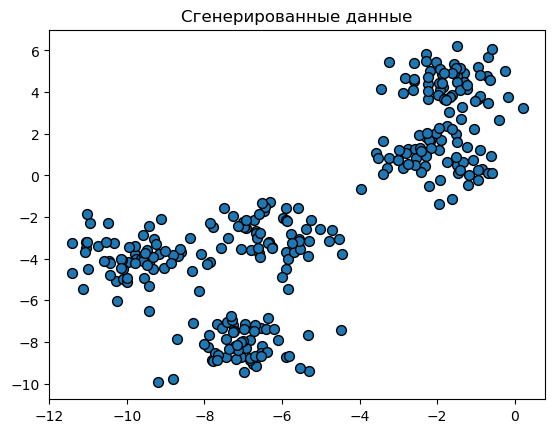

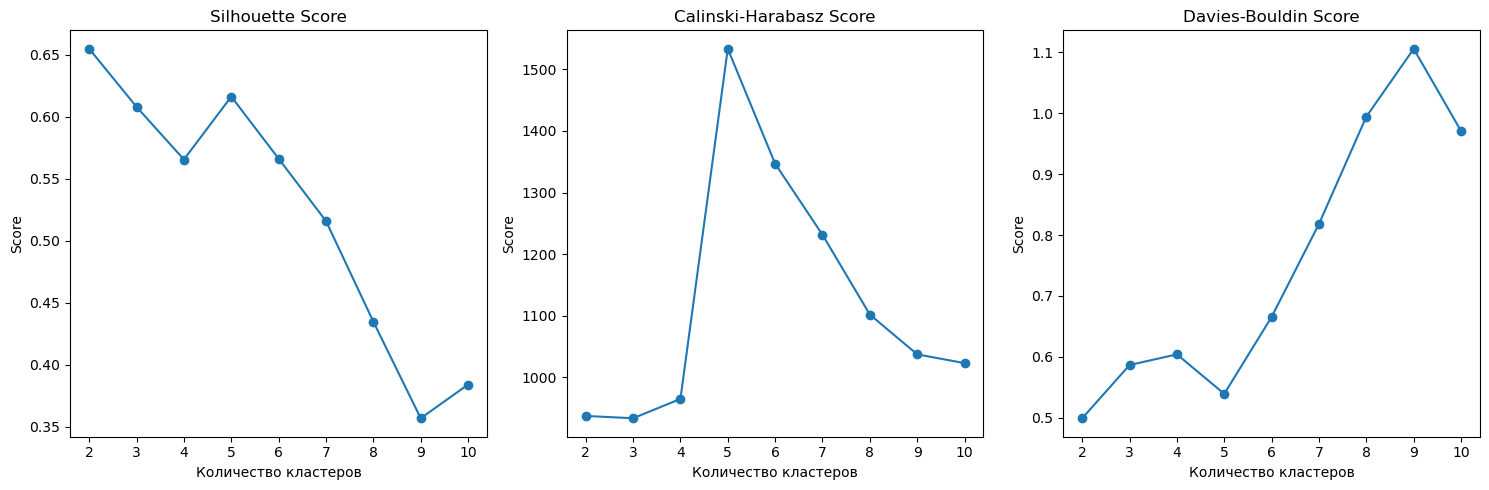

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.title("Сгенерированные данные")
plt.show()

k_values = range(2, 11)
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(X)
    
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))
    davies_scores.append(davies_bouldin_score(X, labels))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_scores, marker='o')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_scores, marker='o')
plt.title("Davies-Bouldin Score")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


In [5]:
best_k_silhouette = k_values[np.argmax(silhouette_scores)]
best_k_calinski = k_values[np.argmax(calinski_scores)]
best_k_davies = k_values[np.argmin(davies_scores)]

print("best Silhouette:", best_k_silhouette)
print("best Calinski-Harabasz:", best_k_calinski)
print("best Davies-Bouldin:", best_k_davies)

best Silhouette: 2
best Calinski-Harabasz: 5
best Davies-Bouldin: 2


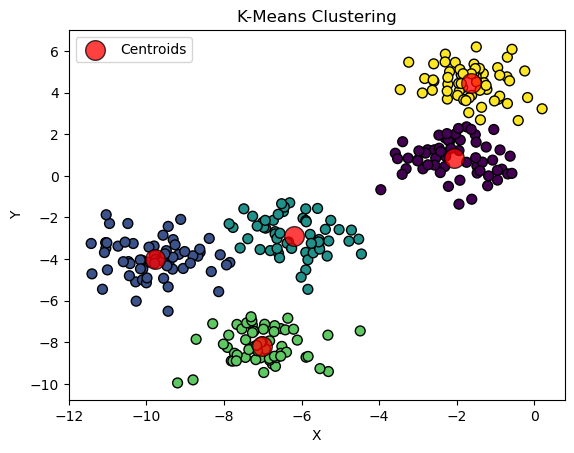

In [6]:
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids', edgecolor='k')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 2. Повторение - мать ученья

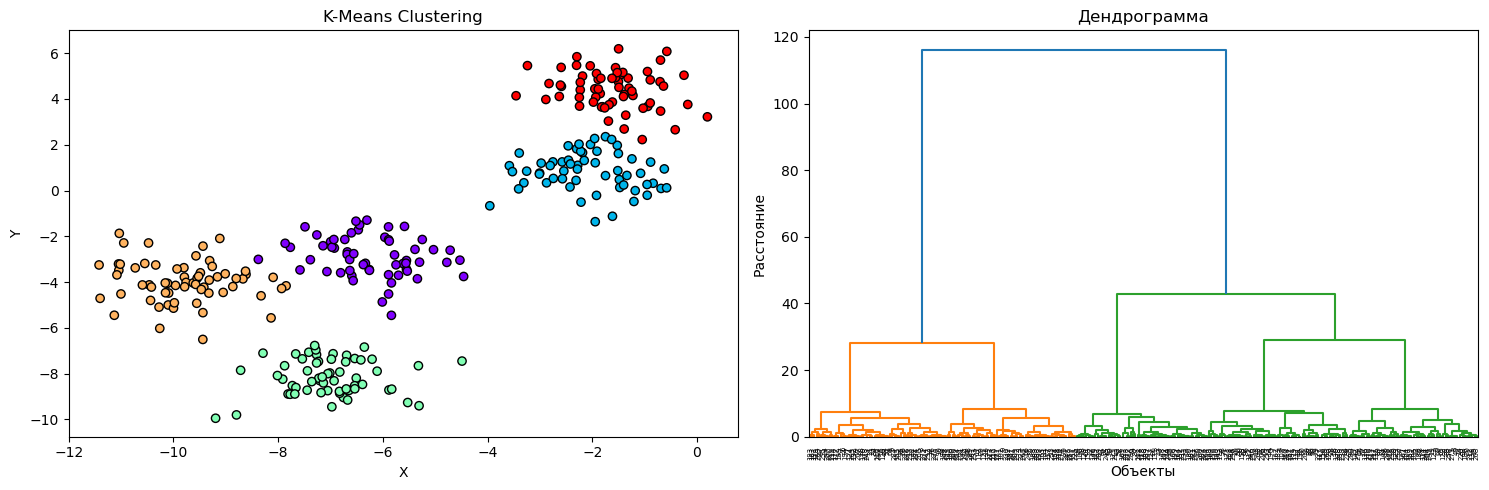

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Генерация данных
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

agglom_clustering = AgglomerativeClustering(n_clusters=5,
                                            linkage = 'ward') # n_clusters - где обрезать дендрограмму
clusters = agglom_clustering.fit_predict(X)

Z = linkage(X, method='ward')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
axs[0].set_title('K-Means Clustering')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

dendrogram(Z, ax=axs[1])
axs[1].set_title('Дендрограмма')
axs[1].set_xlabel('Объекты')
axs[1].set_ylabel('Расстояние')

plt.tight_layout()
plt.show()

# 3. Матрица расстояний (смежности) и матрица сходств

Матрица смежности


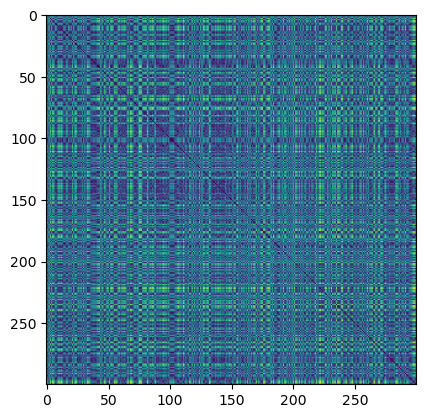

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Генерация данных
A = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
x = A[0]
M1 = pairwise_distances(x)
M2 = np.ones([300,300])-M1
print('Матрица смежности')
plt.imshow(M1)

Матрица сходства


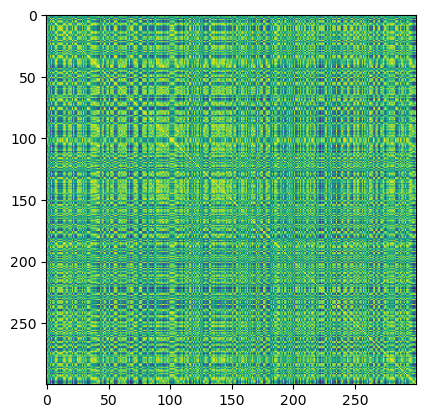

In [9]:
print('Матрица сходства')
plt.imshow(M2,label='Матрица сходства')

# 4. Игрушечные галактики (Источник - Pelican :)

,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


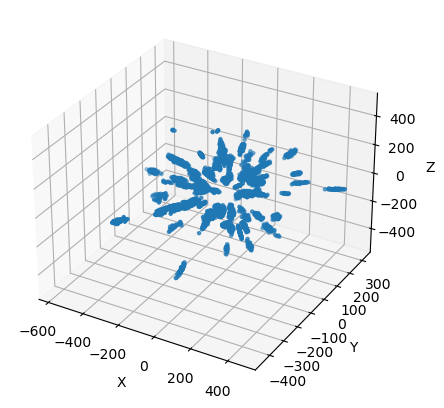

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("file_vm.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
# Эта функция понадобится для отображения результата кластеризации и ARI
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    ARI = round(ari(data.label,cluster.labels_),4) # считаем ARI - оценка качества кластеризации


    print('ARI = {}'.format(ARI))

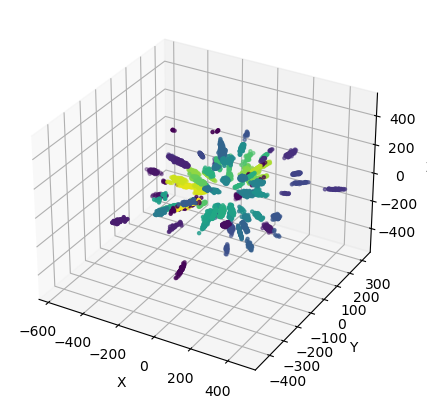

ARI = 0.907


In [ ]:
# hdbscan работает следующим образом
cluster = hdbscan.HDBSCAN(metric="euclidean",
                          min_cluster_size=12,
                          algorithm="generic",
                          alpha=0.5,
                          cluster_selection_method='eom')

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data,cluster) # Отображаем кластеризацию и полученный ARI